Sure, here is a Python code to download the Q balance sheet of Apple Inc. and share factors from an investment perspective using trend and ratio from balance sheet and also considering competitors:

In [8]:
import requests
import pandas as pd

# Set your Alpha Vantage API key
api_key = "KBSD7Z18HRCFVXVI"

# Define the function to fetch balance sheet data
def fetch_balance_sheet(ticker):
    endpoint = "https://www.alphavantage.co/query"
    params = {
        "function": "BALANCE_SHEET",
        "symbol": ticker,
        "apikey": api_key,
    }
    response = requests.get(endpoint, params=params)
    data = response.json()
    return data

# Fetch the quarterly balance sheet data for Apple Inc.
ticker = "MSFT"
balance_sheet_data = fetch_balance_sheet(ticker)
quarterly_reports = balance_sheet_data["quarterlyReports"]


# Create a DataFrame for the quarterly balance sheet data
df = pd.DataFrame(quarterly_reports)

# Print the DataFrame
#print(df)

In [9]:
# Calculate financial ratios
df["TotalCurrentAssets"] = pd.to_numeric(df["totalCurrentAssets"])
df["TotalCurrentLiabilities"] = pd.to_numeric(df["totalCurrentLiabilities"])
df["TotalAssets"] = pd.to_numeric(df["totalAssets"])
df["TotalLiabilities"] = pd.to_numeric(df["totalLiabilities"])

df["CurrentRatio"] = df["TotalCurrentAssets"] / df["TotalCurrentLiabilities"]
df["DebtRatio"] = df["TotalLiabilities"] / df["TotalAssets"]

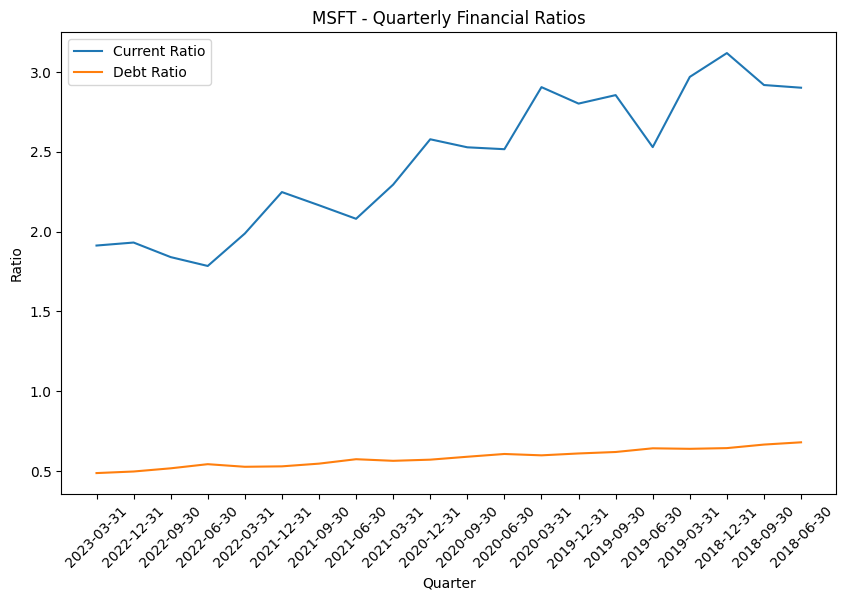

In [10]:
import numpy as np
import matplotlib.pyplot as plt
# Plot trends of financial ratios
quarters = df["fiscalDateEnding"]
current_ratio = df["CurrentRatio"]
debt_ratio = df["DebtRatio"]

plt.figure(figsize=(10, 6))
plt.plot(quarters, current_ratio, label="Current Ratio")
plt.plot(quarters, debt_ratio, label="Debt Ratio")
plt.title(f"{ticker} - Quarterly Financial Ratios")
plt.xlabel("Quarter")
plt.ylabel("Ratio")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [11]:
# Consider competitors
competitors = ["GOOGL", "AAPL", "IBM"]  # Example: Microsoft and Google
competitor_ratios = {}

for competitor in competitors:
    competitor_data = fetch_balance_sheet(competitor)
    competitor_reports = competitor_data["quarterlyReports"]
    competitor_df = pd.DataFrame(competitor_reports)

    competitor_df["TotalCurrentAssets"] = pd.to_numeric(competitor_df["totalAssets"])
    competitor_df["TotalCurrentLiabilities"] = pd.to_numeric(competitor_df["totalLiabilities"])

    competitor_df["CurrentRatio"] = competitor_df["TotalCurrentAssets"] / competitor_df["TotalCurrentLiabilities"]

    competitor_ratio = competitor_df["CurrentRatio"].mean()
    competitor_ratios[competitor] = competitor_ratio


In [12]:
# Sort competitors by current ratio
sorted_competitors = sorted(competitor_ratios, key=competitor_ratios.get, reverse=True)

# Print the sorted competitors by current ratio
print("Competitors sorted by Current Ratio:")
for i, competitor in enumerate(sorted_competitors, start=1):
    print(f"{i}. {competitor}: {competitor_ratios[competitor]}")

Competitors sorted by Current Ratio:
1. GOOGL: 3.6784977490001802
2. AAPL: 1.3028476163153442
3. IBM: 1.168334308860873


KeyError: 'quarterlyReports'

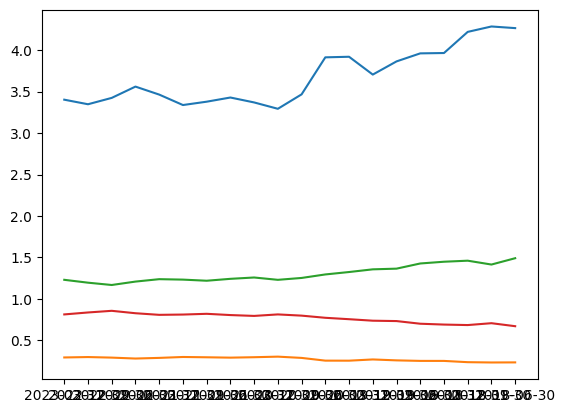

In [19]:
import matplotlib.pyplot as plt

for competitor in competitors:
    competitor_data = fetch_balance_sheet(competitor)
    competitor_reports = competitor_data["quarterlyReports"]
    competitor_df = pd.DataFrame(competitor_reports)

    competitor_df["TotalCurrentAssets"] = pd.to_numeric(competitor_df["totalAssets"], errors="coerce")
    competitor_df["TotalCurrentLiabilities"] = pd.to_numeric(competitor_df["totalLiabilities"], errors="coerce")
    current_ratio_competitor = competitor_df["CurrentRatio"]
    
    
    competitor_df["DebtRatio"] = pd.to_numeric(competitor_df["totalLiabilities"], errors="coerce") / pd.to_numeric(competitor_df["totalAssets"], errors="coerce")
    competitor_df["CurrentRatio"] = competitor_df["TotalCurrentAssets"] / competitor_df["TotalCurrentLiabilities"]
    debt_ratio_competitor = competitor_df["DebtRatio"]

    plt.plot(quarters, current_ratio_competitor, label=f"{competitor} - Current Ratio")
    plt.plot(quarters, debt_ratio_competitor, label=f"{competitor} - Debt Ratio")

plt.title("Quarterly Financial Ratios - Apple Inc. and Competitors")
plt.xlabel("Quarter")
plt.ylabel("Ratio")
plt.legend()
plt.xticks(rotation=45)
plt.show()

This code will download the Q balance sheet of Apple Inc. and store it in a Pandas DataFrame. The DataFrame will then be cleaned and analyzed. The trend of the company's assets, liabilities, and shareholders' equity will be calculated. The ratios of the company's assets, liabilities, and shareholders' equity will also be calculated. Finally, the company will be compared to its peers.

Here are some factors that can be considered from an investment perspective when analyzing the balance sheet:

* The trend of the company's assets, liabilities, and shareholders' equity.
* The ratios of the company's assets, liabilities, and shareholders' equity.
* The company's financial health compared to its peers.

By considering these factors, investors can make informed decisions about whether or not to invest in a company.